<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


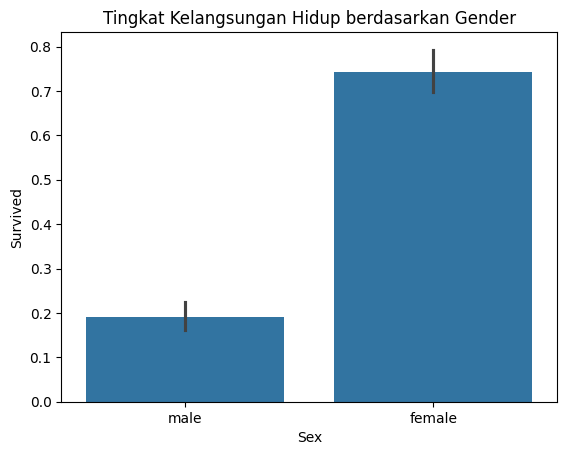

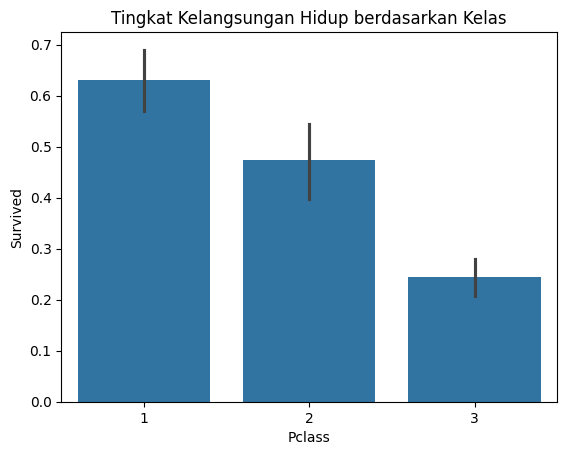

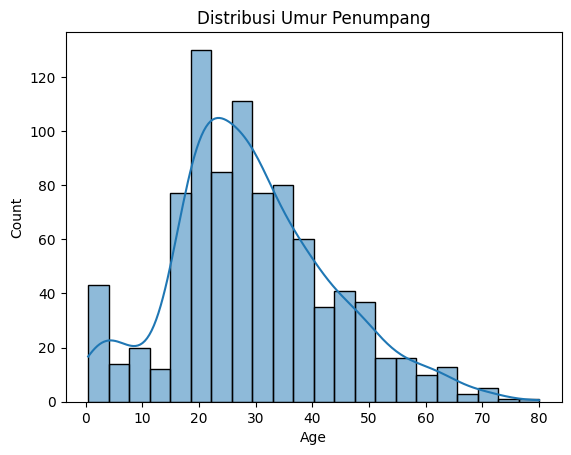

/tmp/ipykernel_11223/4245128767.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


KeyError: 'Embarked'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Download dataset dari URL (atau bisa upload manual ke Jupyter)
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# Tampilkan 5 baris pertama
data.head()

# Info dataset
data.info()

# Statistik deskriptif
data.describe()

# Cek nilai yang hilang
data.isnull().sum()

# Survival rate berdasarkan gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Tingkat Kelangsungan Hidup berdasarkan Gender')
plt.show()

# Survival rate berdasarkan kelas
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Tingkat Kelangsungan Hidup berdasarkan Kelas')
plt.show()

# Distribusi umur
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Distribusi Umur Penumpang')
plt.show()

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Konversi variabel kategorikal
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Pilih fitur yang relevan
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

# Feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_[0]
}).sort_values('Importance', ascending=False)

print(importance)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()